In [223]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.callbacks import EarlyStopping
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import random
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools

In [224]:
timeframe = 40
stride = 1
num_features = 5
n_classes = 3

In [225]:
x_train = np.loadtxt('./data/X_train_transformed.csv')
x_train = x_train.reshape(x_train.shape[0], timeframe, num_features)
y_train = np.loadtxt('./data/y_train_transformed.csv').astype(int)
x_test = np.loadtxt('./data/X_test_transformed.csv')
x_test = x_test.reshape(x_test.shape[0], timeframe, num_features)
y_test = np.loadtxt('./data/y_test_transformed.csv').astype(int)

unique_labels = np.unique(y_train)
class_mapping = {label: i for i, label in enumerate(unique_labels)}
y_train_encoded = np.array([class_mapping[label] for label in y_train])
y_test_encoded = np.array([class_mapping[label] for label in y_test])

In [226]:
random.seed(42)
# selection of 1000 random samples from the test set
random_indices = random.sample(range(len(x_test)), 1000)
X_test_sample = x_test[random_indices]
y_test_sample = y_test_encoded[random_indices]

In [227]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    if normalize: cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return


In [228]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

In [229]:
model = Sequential([
    Input(shape=(timeframe, num_features)),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=64, kernel_size=3, activation='relu', padding='same'),
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(n_classes, activation='softmax')
])
model.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7857 - loss: 0.4607 - val_accuracy: 0.8952 - val_loss: 0.1898
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9271 - loss: 0.1463 - val_accuracy: 0.9379 - val_loss: 0.1321
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9433 - loss: 0.1253 - val_accuracy: 0.9383 - val_loss: 0.1314
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9452 - loss: 0.1181 - val_accuracy: 0.9601 - val_loss: 0.0985
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9602 - loss: 0.1010 - val_accuracy: 0.9580 - val_loss: 0.1058
Epoch 6/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9636 - loss: 0.0904 - val_accuracy: 0.9571 - val_loss: 0.1065
Epoch 7/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9647 - loss: 0.0881 - val_accuracy: 0.9702 - val_loss: 0.0831
Epoch 8/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9692 - loss: 0.0807 - val_accuracy: 0.

In [230]:
loss, accuracy = model.evaluate(x_test, y_test_encoded)
print("Loss:", loss)
print("Accuracy:", accuracy)

# evaluation of the model on the 1000 samples
y_pred_model = model.predict(X_test_sample)
# we take the class with the highest probability
y_pred_classes = np.argmax(y_pred_model, axis = 1)
accuracy_model = accuracy_score(y_test_sample, y_pred_classes)
precision_model = precision_score(y_test_sample, y_pred_classes, average='weighted')
recall_model = recall_score(y_test_sample, y_pred_classes, average='weighted')
f1_score_model = f1_score(y_test_sample, y_pred_classes, average='weighted')
conf_matrix_model = confusion_matrix(y_test_sample, y_pred_classes)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9731 - loss: 0.0821
Loss: 0.07571127265691757
Accuracy: 0.9735124111175537
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [231]:
accuracy_model, precision_model, recall_model, f1_score_model, conf_matrix_model

(0.975,
 0.9753187796994843,
 0.975,
 0.9750161628013263,
 array([[ 68,   0,   2],
        [  0, 581,   6],
        [  7,  10, 326]]))

In [232]:
model_2 = Sequential([
    Input(shape=(timeframe, num_features)),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),
    Conv1D(filters=128, kernel_size=3, activation='relu', padding='same'),   
    MaxPooling1D(pool_size=2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])
model_2.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history_2 = model_2.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.8115 - loss: 0.3979 - val_accuracy: 0.9407 - val_loss: 0.1302
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9283 - loss: 0.1461 - val_accuracy: 0.9496 - val_loss: 0.1112
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9448 - loss: 0.1233 - val_accuracy: 0.9532 - val_loss: 0.1107
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9446 - loss: 0.1266 - val_accuracy: 0.9420 - val_loss: 0.1331
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9576 - loss: 0.1048 - val_accuracy: 0.9338 - val_loss: 0.1206


In [233]:
loss_2, accuracy_2 = model_2.evaluate(x_test, y_test_encoded)
print("Loss:", loss_2)
print("Accuracy:", accuracy_2)

y_pred_model_2 = model_2.predict(X_test_sample)
y_pred_classes = np.argmax(y_pred_model_2, axis = 1)

accuracy_model_2 = accuracy_score(y_test_sample, y_pred_classes)
precision_model_2 = precision_score(y_test_sample, y_pred_classes, average='weighted')
recall_model_2 = recall_score(y_test_sample, y_pred_classes, average='weighted')
f1_score_model_2 = f1_score(y_test_sample, y_pred_classes, average='weighted')
conf_matrix_model_2 = confusion_matrix(y_test_sample, y_pred_classes)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9405 - loss: 0.1347
Loss: 0.13015833497047424
Accuracy: 0.9406827092170715
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [234]:
accuracy_model_2, precision_model_2, recall_model_2, f1_score_model_2, conf_matrix_model_2

(0.943,
 0.9426756164293909,
 0.943,
 0.9425978650591487,
 array([[ 49,   0,  21],
        [  0, 587,   0],
        [ 22,  14, 307]]))

In [252]:
model_3 = Sequential([
    Input(shape=(timeframe, num_features)),
    Conv1D(filters=128, kernel_size=3, activation='relu', strides=2, padding='same'),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(n_classes, activation='softmax')
])
model_3.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model_3.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.7911 - loss: 0.4373 - val_accuracy: 0.9174 - val_loss: 0.1541
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9212 - loss: 0.1506 - val_accuracy: 0.9355 - val_loss: 0.1496
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9306 - loss: 0.1387 - val_accuracy: 0.9314 - val_loss: 0.1396
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9408 - loss: 0.1244 - val_accuracy: 0.9351 - val_loss: 0.1231
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9496 - loss: 0.1156 - val_accuracy: 0.9565 - val_loss: 0.1053


In [253]:
loss_3, accuracy_3 = model_3.evaluate(x_test, y_test_encoded)
print("Loss:", loss_3)
print("Accuracy:", accuracy_3)

y_pred_model_3 = model_3.predict(X_test_sample)
y_pred_classes = np.argmax(y_pred_model_3, axis = 1)

accuracy_model_3 = accuracy_score(y_test_sample, y_pred_classes)
precision_model_3 = precision_score(y_test_sample, y_pred_classes, average='weighted')
recall_model_3 = recall_score(y_test_sample, y_pred_classes, average='weighted')
f1_score_model_3 = f1_score(y_test_sample, y_pred_classes, average='weighted')
conf_matrix_model_3 = confusion_matrix(y_test_sample, y_pred_classes)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 781us/step - accuracy: 0.9202 - loss: 0.1529
Loss: 0.15410973131656647
Accuracy: 0.9173661470413208
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [254]:
accuracy_model_3, precision_model_3, recall_model_3, f1_score_model_3, conf_matrix_model_3 

(0.902,
 0.9435544739998143,
 0.902,
 0.9085883016543623,
 array([[ 70,   0,   0],
        [  0, 585,   2],
        [ 79,  17, 247]]))

In [244]:
model_4 = Sequential([
   Input(shape=(timeframe, num_features)),
   Conv1D(filters=128, kernel_size=2, activation='relu', padding='same'),
   Conv1D(filters=64, kernel_size=2, activation='relu', padding='same'),
   MaxPooling1D(pool_size=2),
   Conv1D(filters=16, kernel_size=2, activation='relu', padding='same'),
   MaxPooling1D(pool_size=2),
   Flatten(),
   Dense(64, activation='relu'),
   Dense(n_classes, activation='softmax')
])
model_4.compile(optimizer='adam', loss=tf.keras.losses.SparseCategoricalCrossentropy(), metrics=['accuracy'])
history = model_4.fit(x_train, y_train_encoded, epochs=50, batch_size=32, validation_data=(x_test, y_test_encoded), callbacks=[early_stopping])

Epoch 1/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7885 - loss: 0.4405 - val_accuracy: 0.9377 - val_loss: 0.1279
Epoch 2/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9362 - loss: 0.1291 - val_accuracy: 0.9248 - val_loss: 0.1565
Epoch 3/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9422 - loss: 0.1245 - val_accuracy: 0.9565 - val_loss: 0.1055
Epoch 4/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9600 - loss: 0.0983 - val_accuracy: 0.9743 - val_loss: 0.0768
Epoch 5/50
674/674 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9631 - loss: 0.0906 - val_accuracy: 0.9619 - val_loss: 0.0907


In [247]:
loss_4, accuracy_4 = model_4.evaluate(x_test, y_test_encoded)
print("Loss:", loss_4)
print("Accuracy:", accuracy_4)

y_pred_model_4 = model_4.predict(X_test_sample)
y_pred_classes = np.argmax(y_pred_model_4, axis = 1)
accuracy_model_4 = accuracy_score(y_test_sample, y_pred_classes)
precision_model_4 = precision_score(y_test_sample, y_pred_classes, average='weighted')
recall_model_4 = recall_score(y_test_sample, y_pred_classes, average='weighted')
f1_score_model_4 = f1_score(y_test_sample, y_pred_classes, average='weighted')
conf_matrix_model_4 = confusion_matrix(y_test_sample, y_pred_classes)

168/168 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9388 - loss: 0.1304
Loss: 0.12793177366256714
Accuracy: 0.9376981854438782
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [248]:
accuracy_model_4, precision_model_4, recall_model_4, f1_score_model_4, conf_matrix_model_4

(0.933,
 0.9508965865552073,
 0.933,
 0.9364282794175718,
 array([[ 68,   0,   2],
        [  0, 582,   5],
        [ 48,  12, 283]]))

## Comparison of models 1 and 3

In [241]:
print(model.summary())
print(model_3.summary())

Model: "sequential_50"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_95 (Conv1D)              │ (None, 40, 64)         │         1,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_96 (Conv1D)              │ (None, 40, 64)         │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_45 (MaxPooling1D) │ (None, 20, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_50 (Flatten)            │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_142 (Dense)               │ (None, 64)             │        81,984 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_143 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_144 (Dense)               │ (None, 3)              │            99 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 292,619 (1.12 MB)

 Trainable params: 97,539 (381.01 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 195,080 (762.04 KB)

None


Model: "sequential_52"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_99 (Conv1D)              │ (None, 20, 128)        │         2,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_52 (Flatten)            │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_148 (Dense)               │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_149 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_150 (Dense)               │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,014,923 (3.87 MB)

 Trainable params: 338,307 (1.29 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 676,616 (2.58 MB)

None


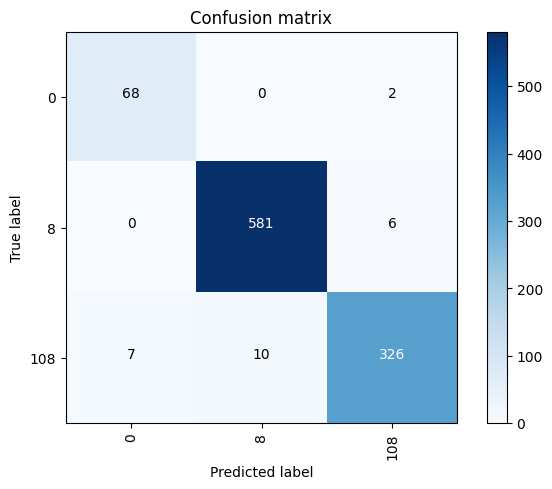

In [242]:
plot_confusion_matrix(conf_matrix_model, classes = [0, 8, 108])

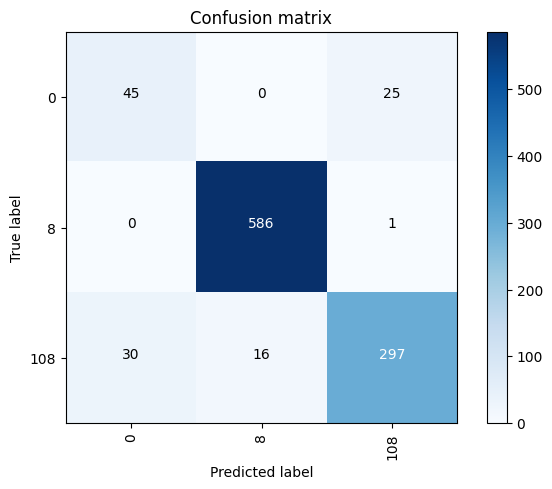

In [243]:
plot_confusion_matrix(conf_matrix_model_3, classes = [0, 8, 108])


The model #1 has two convolutional layers before the max pooling layer. This costs in more computational power but allows to learn more complex features. [1] 

By stacking multiple Conv1D layers with smaller filters, we introduce multiple non-linear activations (ReLU) in between the layers. This increases the overall non-linearity of the model, making the decision function more discriminative and capable of capturing more complex patterns in the data. [2]

MaxPooling1D with a pool size of 2 reduces the spatial dimension by half, which helps in reducing the computational complexity in fully connected layers and risk of overfitting by summarizing the learned features.

The kernel size was chosen odd as it allows to have a central value which is preferred in most cases. [3]


The model #3 has only one convolutional layer and no pooling layer. This model is simpler and faster to train and it performs quite well on the random test set. Instead of using the MaxPooling1D layer, I have set the strides parameter to two and the padding to 'same'.  [4], [5] This allows to reduce the spatial dimension by half (but not changing the output size because we have added the padding) at the same time as feature extraction and to keep the important information for the classification.

I have also tried to train a model similar to the model #3 but adding MaxPooling1D layer after the convolutional layer (strides=1). The model performed lightly worse than the model #3 on several random test datasets. This may be due to the fact that the 1D data we have is already quite simple and the pooling layer may have removed some important information for the classification. But in general, both architectures perform similarly on the random test datasets.

In conclusion, the model #1 is more complex and computationally expensive but it allows to learn more complex features. The model #3 is simpler and faster to train. In the case of our time series data, it seems that model #1 is better, especially for classifying the class '0'. 

Sources:
- [1] https://stats.stackexchange.com/questions/343168/keras-functional-model-for-cnn-why-2-conv-layers
- [2] Simonyan, K., & Zisserman, A. (2014). Very deep convolutional networks for large-scale image recognition. arXiv preprint arXiv:1409.1556.
- [3] https://medium.com/analytics-vidhya/how-to-choose-the-size-of-the-convolution-filter-or-kernel-size-for-cnn-86a55a1e2d15
- [4] https://stats.stackexchange.com/questions/288261/why-is-max-pooling-necessary-in-convolutional-neural-networks
- [5] Springenberg, J. T., Dosovitskiy, A., Brox, T., & Riedmiller, M. (2014). Striving for simplicity: The all convolutional net. arXiv preprint arXiv:1412.6806.